In [1]:
import pandas as pd

df_clean = pd.read_csv('/content/donnees_olympiques_clean_final.csv')

Entraînement de l'IA
Entraînement terminé !
Précision globale : 87.17%


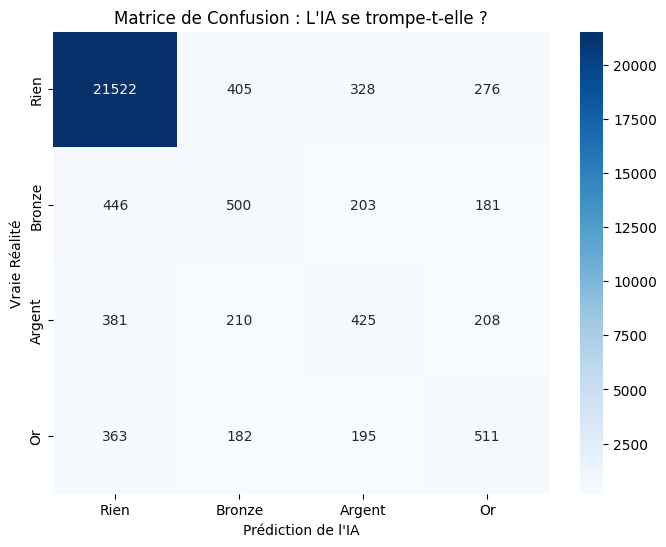

Le modèle est sauvegardé sous 'modele_jo_2024.pkl'


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Séparation
X = df_clean.drop(columns=['target'])
y = df_clean['target']

# On garde 20% des données de côté
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entraînement
print("Entraînement de l'IA")
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(f"Entraînement terminé !")
print(f"Précision globale : {accuracy_score(y_test, y_pred):.2%}")

# Visualisation
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rien', 'Bronze', 'Argent', 'Or'],
            yticklabels=['Rien', 'Bronze', 'Argent', 'Or'])
plt.ylabel('Vraie Réalité')
plt.xlabel('Prédiction de l\'IA')
plt.title('Matrice de Confusion : L\'IA se trompe-t-elle ?')
plt.show()

# Sauvegarde
joblib.dump(model, 'modele_jo_2024.pkl')
print("Le modèle est sauvegardé sous 'modele_jo_2024.pkl'")

## Feature Importance

/tmp/ipython-input-3918183179.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=df_imp, palette='magma')


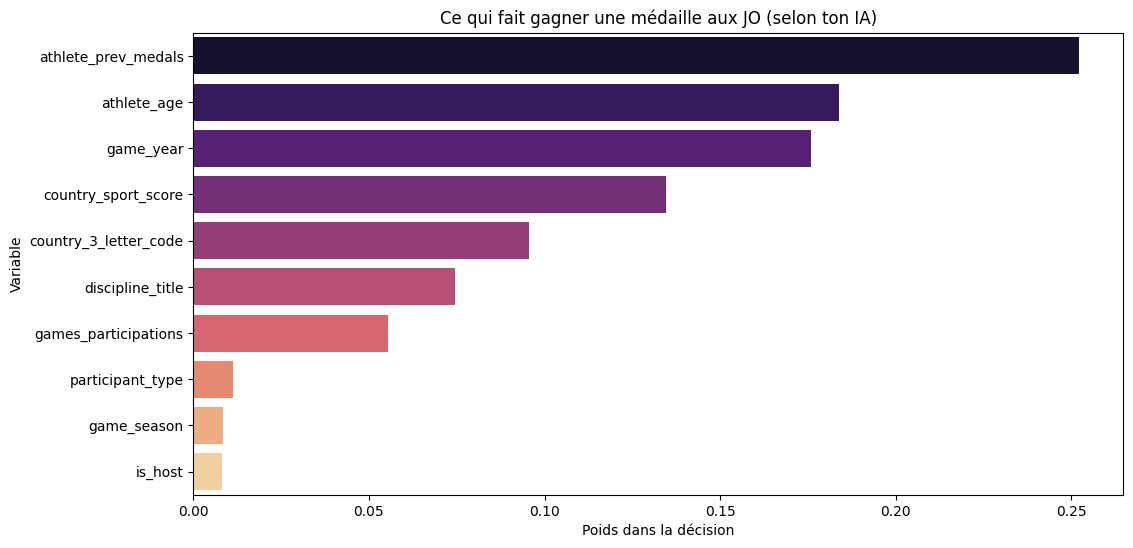

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On récupère les colonnes utilisées
feature_names = X.columns
importances = model.feature_importances_

# On crée un tableau propre pour l'affichage
df_imp = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

# Affichage graphique
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Variable', data=df_imp, palette='magma')
plt.title('Ce qui fait gagner une médaille aux JO (selon ton IA)')
plt.xlabel('Poids dans la décision')
plt.show()